In [1]:
import pandas as pd
import quandl
import numpy as np
import matplotlib.pyplot as plt
from sklearn.base import TransformerMixin
from sklearn.datasets import make_regression
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn import preprocessing,cross_validation
from sklearn.model_selection import cross_val_predict
from sklearn.svm import SVR
from mlxtend.regressor import StackingRegressor
from sklearn.model_selection import cross_val_score
from sklearn import metrics

/root/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
quandl.ApiConfig.api_key = "zuiQMfguw3rRgLvkCzxk"
df=quandl.get('WIKI/GOOGl')

In [3]:
### create the specfic ammount of label and feture 
df1=df[['Adj. Open','Adj. High','Adj. Low','Adj. Close','Adj. Volume']]

###redefining the data
### adding some feture to the datasets
df1['volatility']=(df1['Adj. High']-df1['Adj. Close'])/df1['Adj. Close']
df1['PCT_Change']=(df1['Adj. Close']-df1['Adj. Open'])/df1['Adj. Open'] 

/root/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/root/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [4]:
## now making our final dataframe
df1=df1[['Adj. Close','volatility','PCT_Change','Adj. Open','Adj. Volume']]

In [5]:
## setting the forcast column what se gonna predict
forcast_col='Adj. Close'

In [6]:


# we cant work with the null value so we replace with them with a negative large number of value
df1.fillna(-999999,inplace=True)


In [7]:
##### importing some mathmatical function
##### and we predict the 1% of the data
import math
forcast_out = int(math.ceil(.1*(len(df1))))
print forcast_out

343


In [8]:
## plotting the data
## lets plot the output before the prdiction
Y=df1[forcast_col]
X=range(len(df1[forcast_col]))

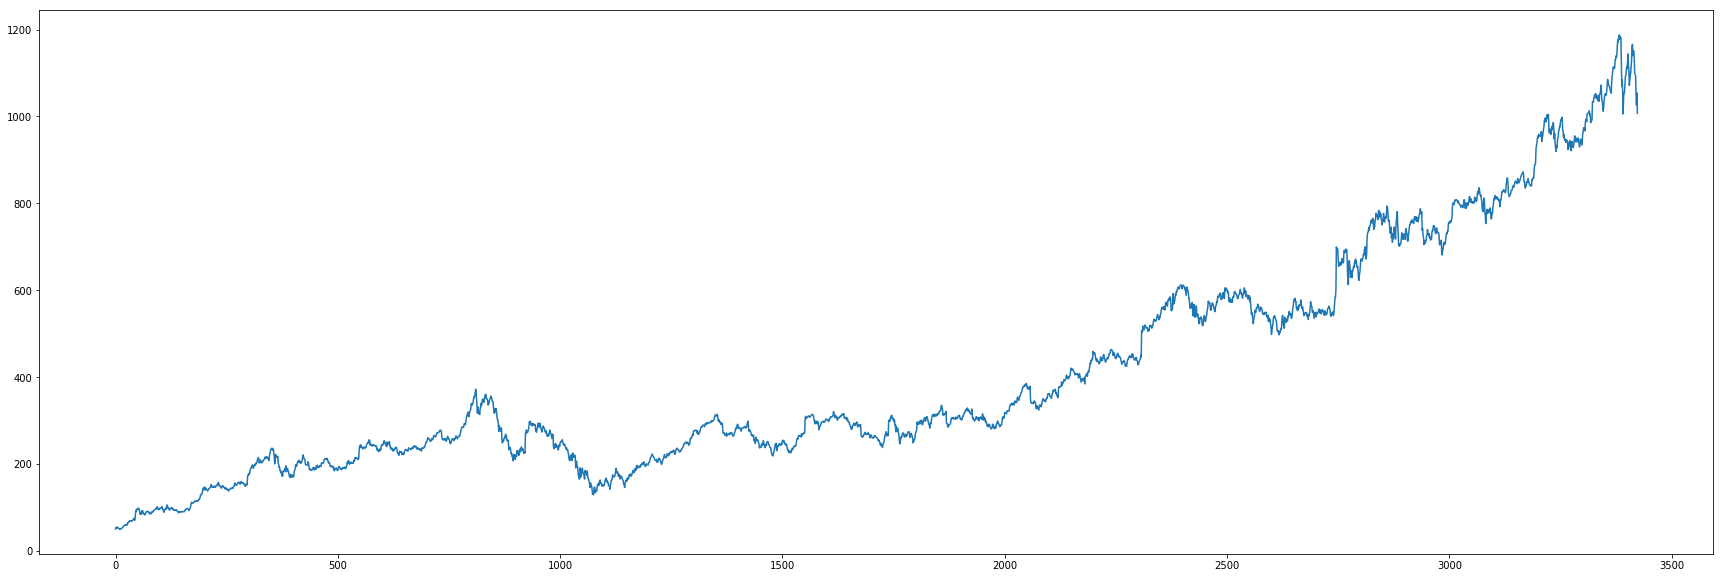

In [9]:
fig_size=[30,10]
plt.rcParams["figure.figsize"] = fig_size
plt.plot(X,Y)

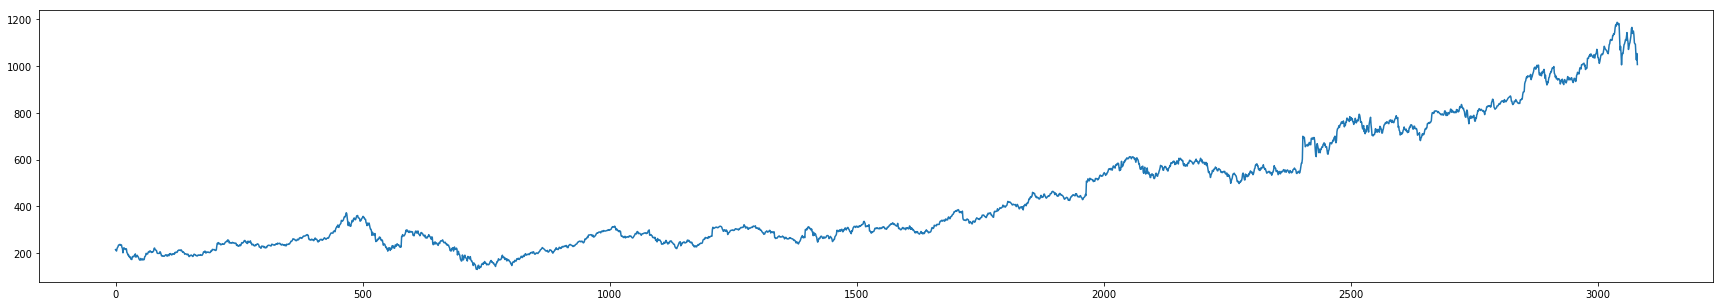

In [10]:
df1['label'] = df[forcast_col].shift(-forcast_out)
y1 = df1['label']
x1=range(len(df1['label']))
fig_size=[30,5]
plt.rcParams["figure.figsize"] = fig_size
plt.plot(x1,y1)

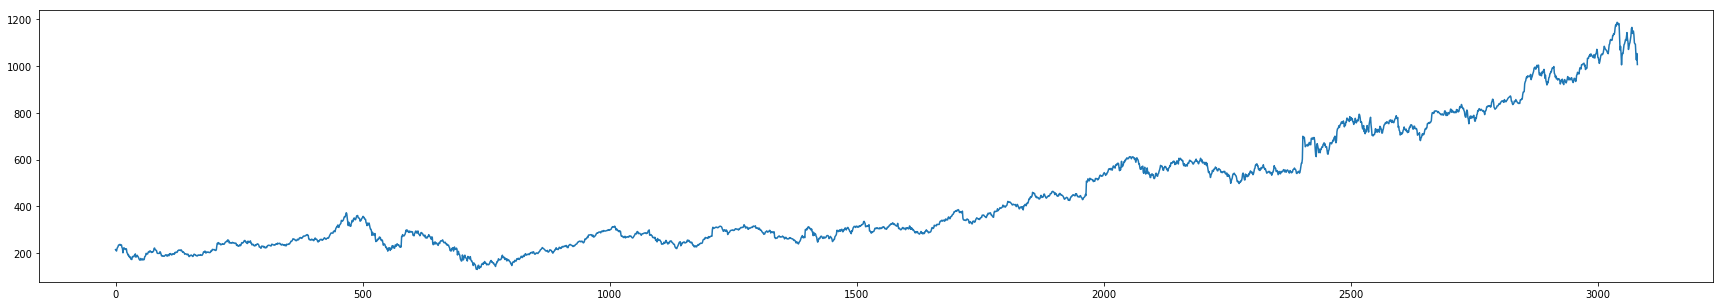

In [11]:
df1['label'] = df[forcast_col].shift(-forcast_out)
y1 = df1['label']
x1=range(len(df1['label']))
fig_size=[30,5]
plt.rcParams["figure.figsize"] = fig_size
plt.plot(x1,y1)

In [12]:
X=np.array(df1.drop(['label'],1))

In [13]:
##scale the data
X=preprocessing.scale(X)
X=X[:-forcast_out]  ##data what is known
X_lately=X[-forcast_out:]
##X_lately.reshape(1, -1)##data which is not known
df1.dropna(inplace=True)

In [14]:
Y=np.array(df1['label'])

In [15]:
xtrain,xtest,ytrain,ytest=cross_validation.train_test_split(X,Y,test_size=0.2)

In [37]:
df1['forcast'].plot()
plt.xlabel('Date')
plt.ylabel('Price')


KeyError: 'forcast'